In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import json

In [2]:
data = pd.read_json('exercises.json')
dataset = data.transpose()
dataset

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,Tree,388.880747,86.980328,392.675385,77.83027,380.206068,80.079787,409.512755,83.805995,367.088473,...,357.245058,230.150662,400.668694,312.815586,404.315279,317.937271,379.390631,398.775967,378.463857,395.66858
1,Tree,336.308472,82.230428,340.794474,71.613417,321.087351,73.302806,361.337997,78.599869,301.771311,...,376.864549,225.963264,358.050653,325.044747,324.106285,292.839503,317.604542,422.846609,312.672155,427.041939
2,Tree,362.101544,101.28101,366.34141,90.619742,345.050093,91.91156,387.985783,99.798594,323.456727,...,325.561226,251.76673,385.981407,330.420206,381.912326,329.042522,354.904324,419.374076,353.554383,421.019726
3,Tree,357.860947,125.460601,353.13993,120.174951,352.976063,119.756496,362.736934,129.061475,338.743997,...,326.942308,248.992999,351.16569,342.254255,352.445215,342.551214,337.988982,416.070412,341.193905,413.106189
4,Tree,347.582604,45.507914,354.059575,39.663758,333.30526,42.086739,375.699621,47.399896,312.683947,...,287.249659,222.105152,347.102397,346.096927,325.605987,375.324854,321.316028,435.147063,314.664069,440.534612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,Warrior2,360.074743,69.09757,367.222419,62.749764,356.047466,63.494912,388.201723,65.969337,362.272359,...,365.934544,272.047492,430.291719,336.966626,420.084006,336.110774,298.731474,438.614814,299.841191,437.090585
783,Warrior2,350.33584,199.718518,355.112069,198.393656,352.216934,196.42702,361.256703,195.693501,383.380247,...,369.692436,317.720224,325.279379,332.148356,327.698359,328.83184,339.579179,405.02147,346.271512,416.150476
784,Warrior2,266.128333,278.019578,267.700889,265.14616,265.022304,265.538135,285.94271,266.190036,263.08155,...,52.974037,320.858005,198.311796,337.047634,198.948375,334.029325,184.446284,372.979003,185.128279,373.671256
785,Warrior2,280.605652,85.761143,288.304468,76.193558,280.560922,77.12818,320.688438,79.783598,284.592038,...,294.278593,274.201909,201.405854,313.374937,199.00089,311.468904,188.469265,424.570312,189.569307,424.944259


In [3]:
dataset.shape

(787, 35)

In [4]:
x = dataset.iloc[:,1:].values
x

array([[388.8807466361155, 86.98032815342386, 392.67538514040564, ...,
        398.7759672232329, 378.4638565230109, 395.6685798629158],
       [336.30847187012483, 82.23042763692179, 340.79447396645867, ...,
        422.84660862785864, 312.67215532371296, 427.04193940033787],
       [362.1015442180187, 101.28100991992594, 366.3414099063963, ...,
        419.3740762246622, 353.554382800312, 421.0197261564449],
       ...,
       [266.1283334145866, 278.0195779463358, 267.70088850429016, ...,
        372.97900289111226, 185.12827856864274, 373.6712557659823],
       [280.6056515698128, 85.76114265933602, 288.30446811622465, ...,
        424.5703125, 189.56930699102963, 424.94425878703225],
       [229.76055175019502, 277.55707104339916, 221.0721772620905, ...,
        410.58875958290025, 290.3944337460999, 410.9629495029886]],
      dtype=object)

In [5]:
y = dataset.iloc[:,0].values
y

array(['Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree',
       'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree',
       'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree',
       'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree',
       'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree',
       'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree',
       'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree',
       'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree',
       'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree',
       'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree',
       'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree',
       'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree',
       'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree',
       'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree', 'Tree',
      

In [6]:
#from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [7]:
x_train.shape

(629, 34)

In [8]:
x_test.shape

(158, 34)

In [9]:
y_train.shape

(629,)

In [10]:
y_test.shape

(158,)

In [11]:
# The score function is simply a utility function for a default metric to be used within some algorithms of scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,158)
test_scores = {}
train_scores = {}
train_score_list = []
test_score_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    train_scores[k] = knn.score(x_train,y_train)
    train_score_list.append(train_scores[k])
    #test_scores[k] = metrics.accuracy_score(y_test,y_pred)
    #print(scores[k])
    test_scores[k] = knn.score(x_test,y_test)
    test_score_list.append(test_scores[k])

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [13]:
y_pred

array(['Downdog', 'Downdog', 'Plank', 'Warrior2', 'Downdog', 'Plank',
       'Plank', 'Tree', 'Plank', 'Warrior2', 'Warrior2', 'Tree', 'Plank',
       'Tree', 'Warrior2', 'Plank', 'Plank', 'Downdog', 'Plank', 'Tree',
       'Warrior2', 'Tree', 'Warrior2', 'Tree', 'Tree', 'Tree', 'Warrior2',
       'Downdog', 'Plank', 'Tree', 'Warrior2', 'Plank', 'Downdog', 'Tree',
       'Tree', 'Plank', 'Plank', 'Warrior2', 'Downdog', 'Downdog',
       'Downdog', 'Downdog', 'Tree', 'Tree', 'Plank', 'Warrior2',
       'Downdog', 'Tree', 'Tree', 'Tree', 'Plank', 'Tree', 'Tree', 'Tree',
       'Tree', 'Warrior2', 'Plank', 'Warrior2', 'Tree', 'Warrior2',
       'Warrior2', 'Plank', 'Downdog', 'Downdog', 'Tree', 'Warrior2',
       'Plank', 'Warrior2', 'Tree', 'Warrior2', 'Tree', 'Warrior2',
       'Plank', 'Tree', 'Warrior2', 'Tree', 'Downdog', 'Warrior2',
       'Plank', 'Plank', 'Tree', 'Plank', 'Plank', 'Tree', 'Warrior2',
       'Plank', 'Tree', 'Plank', 'Downdog', 'Warrior2', 'Tree', 'Tree',
       'T

In [14]:
accuracy = metrics.accuracy_score(y_test,y_pred)
print(accuracy*100)

90.50632911392405


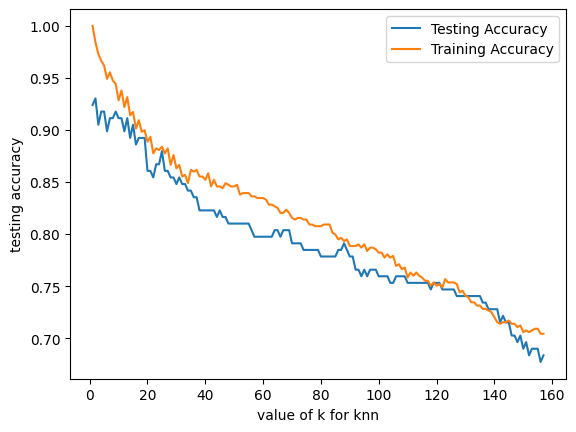

In [15]:
import matplotlib.pyplot as plt
plt.plot(k_range,test_score_list,label = 'Testing Accuracy')
plt.plot(k_range,train_score_list,label = 'Training Accuracy')
plt.legend()
plt.xlabel('value of k for knn')
plt.ylabel('testing accuracy')
plt.show()

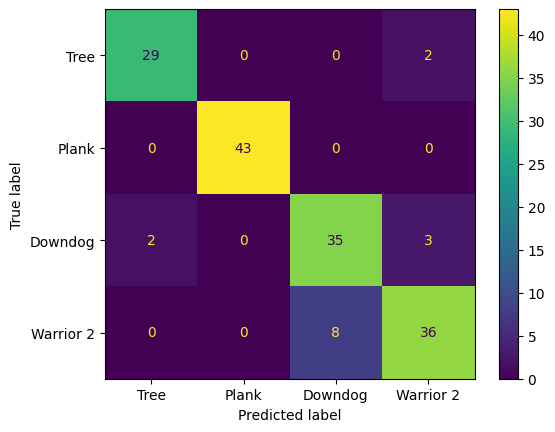

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=['Tree','Plank','Downdog','Warrior 2'])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [16]:
# Predicting using a test image keypoints
data = pd.read_json('./tree_test.json')
dataset = data.transpose()
dataset
print(knn.predict(dataset))

['Tree']


In [17]:
# Predicting using a test image keypoints for warrior 2
data = pd.read_json('./warrior2_test.json')
dataset = data.transpose()
dataset
print(knn.predict(dataset))

['Warrior2']


In [18]:
# Predicting using a test image keypoints for warrior 1
data = pd.read_json('./plank_test.json')
dataset = data.transpose()
print(knn.predict(dataset))

['Plank']


In [19]:
# Predicting using a test image keypoints for warrior 1
data = pd.read_json('./downdog_test.json')
dataset = data.transpose()
print(knn.predict(dataset))

['Downdog']


In [20]:
import pickle
pickle.dump(knn,open('exercises.pkl','wb+'))